# Predict Ad Click Using Logistic Regression

Explore the data to predict who is more likely to click the ad! using **Logistic Regression** based on the features of the user



### Dataset Description



The dataset contains the following attributes:

- **Daily Time Spent on Site** - Consumer time on site in minutes
- **Age** - Cutomer age in years
- **Area Income** - Avg. Income of geographical area of consumer
- **Daily Internet Usage** - Avg. minutes a day consumer is on the internet
- **Ad Topic Line** - Headline of the advertisement
- **City** - City of consumer
- **Male** - Whether or not consumer was male
- **Country** - Country of consumer
- **Timestamp** - Time at which consumer clicked on Ad or closed window
- **Clicked on Ad** - 0 or 1 indicated clicking on Ad

### Tasks to be performed

- Import Required Libraries and analyze the dataset
- Perform Data Visualization on the dataset
- Split the dataset using train_test_split from the sklearn library
- Build a Logistic Regression model and fit the model
- Evaluate the Model

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# import plotly.express as px

In [2]:
# !wget https://www.dropbox.com/s/3u5l88jokdaj1wu/advertising.csv --no-check-certificate
!wget https://www.dropbox.com/s/3u5l88jokdaj1wu/advertising.csv

--2023-01-22 05:07:22--  https://www.dropbox.com/s/3u5l88jokdaj1wu/advertising.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3u5l88jokdaj1wu/advertising.csv [following]
--2023-01-22 05:07:22--  https://www.dropbox.com/s/raw/3u5l88jokdaj1wu/advertising.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucb621fc518edaea25f44c18a269.dl.dropboxusercontent.com/cd/0/inline/B1CGHDDOCDF1EFu7LJeBunLvu70WTpZfz1DXAw0MCbbr3NNpFXz437cQs0f0AIGjZL_eVjpsFLnYLJYmC_QbB_TfA-WL1QVMa-VkMC68tEsPtTp7-YWE07ORtVa8nRBpDYwSPCTPZxAMYWjmhNsGVFlQNlwNMTheQ4lLLWjgyaMspw/file# [following]
--2023-01-22 05:07:23--  https://ucb621fc518edaea25f44c18a269.dl.dropboxusercontent.com/cd/0/inline/B1CGHDDOCDF1EFu7LJeBunLvu70WTpZfz1DXAw0MCbbr3NNpFXz437cQs0f0AIGjZL_eVjp

In [3]:
df = pd.read_csv('advertising.csv')
print(df.shape)
df.head()

(1000, 10)


,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


#### Analyzing the data

In [4]:
df.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [5]:
df.isnull().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [7]:
df.dtypes

Daily Time Spent on Site    float64
Age                           int64
Area Income                 float64
Daily Internet Usage        float64
Ad Topic Line                object
City                         object
Male                          int64
Country                      object
Timestamp                    object
Clicked on Ad                 int64
dtype: object

In [8]:
df['Clicked on Ad'].unique()

array([0, 1])

In [ ]:
df['Clicked on Ad'].value_counts()

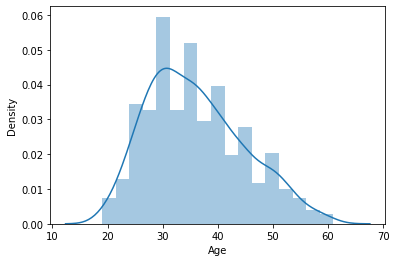

In [9]:
# fig = px.histogram(df, x="Age")
# fig.show()
sns.distplot(df.Age)


- Most of the users present in the dataset fall between the age group of 20 and 40

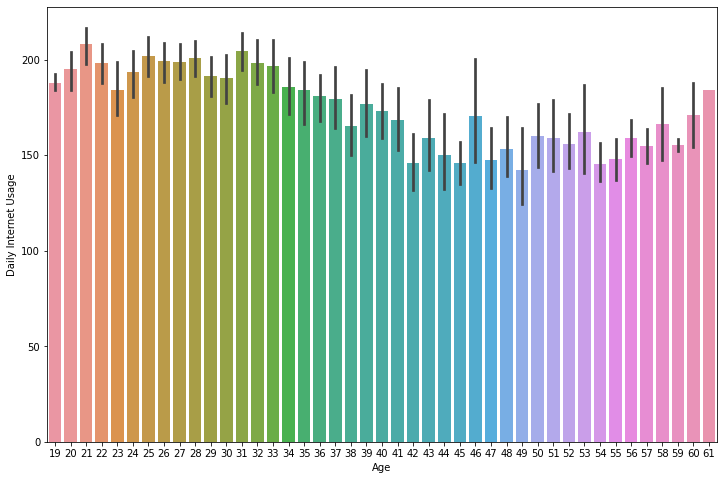

In [10]:
# fig = px.bar(df, x='Age', y='Daily Internet Usage')
# fig.show()
plt.figure(figsize=(12,8))
sns.barplot(data=df, x='Age', y='Daily Internet Usage')

- People between the age group of 20 and 40 spent the most time on Internet

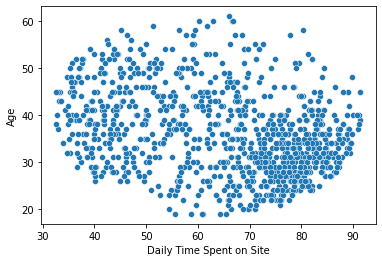

In [11]:
# fig = px.scatter(x= df['Daily Time Spent on Site'], y= df.Age, labels={'x':'Daily Time Spent on Site', 'y':'Age'})
# fig.show()
fig = sns.scatterplot(x= df['Daily Time Spent on Site'], y= df.Age)

#### Observations:
- People in their twenties and thirties spent the most time on site
- Older people tend to spend less time as compared to young people

In [12]:
df['Clicked on Ad'].unique()

array([0, 1])

In [13]:
from sklearn.model_selection import train_test_split
X = df[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage',  'Male']]
y = df['Clicked on Ad']
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size =  0.2, random_state= 42)

In [14]:
train_X.shape, test_X.shape, train_y.shape, test_y.shape

((800, 5), (200, 5), (800,), (200,))

In [15]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X, train_y)

LogisticRegression()

In [16]:
prediction = model.predict(test_X)

In [17]:
prediction

array([0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1])

In [18]:
test_y

521    1
737    1
740    1
660    1
411    0
      ..
408    1
332    1
208    1
613    0
78     1
Name: Clicked on Ad, Length: 200, dtype: int64

Evaluate the Model

- Use a Confusion Matrix and write your observations
- Check the **accuracy_score**
- Print a classification report

In [ ]:
test_X.iloc[0:5,:]

In [19]:
prediction[0:5]

array([0, 1, 1, 1, 0])

In [20]:
test_y.iloc[0:5]

521    1
737    1
740    1
660    1
411    0
Name: Clicked on Ad, dtype: int64

In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_y, prediction)

array([[85,  4],
       [16, 95]])

___
**Observations:**

**Confusion Matrix:**

**Each row:** Actual Class

**Each column:** Predicted Class

**First:** Non-clicked Ads, the **negative class**:

- 181 were correctly classified as Non-clicked Ads. True negatives.
- Remaining 32 were wrongly classified as clicked Ads. False positive

**Second:** The clicked Ads, the **positive class**:

- 10 were incorrectly classified as Non-clicked Ads. False negatives
- 177 were correctly classified clicked Ads. True positives
___

In [23]:
from sklearn.metrics import accuracy_score

print(f"ACCURACY SCORE:\n{accuracy_score(test_y, prediction):.4f}")

ACCURACY SCORE:
0.9000


**Accuracy** is the fraction of predictions our model got right. Formally, accuracy has the following definition:

**Accuracy** = Number of Correct Predictions **/** Total Number of Predictions



___
**Observations:**
- Accuracy comes out to 0.89, or 89% (89 correct predictions out of 100 total examples)
___

In [24]:
from sklearn import metrics
print(metrics.classification_report(test_y, prediction))

              precision    recall  f1-score   support

           0       0.84      0.96      0.89        89
           1       0.96      0.86      0.90       111

    accuracy                           0.90       200
   macro avg       0.90      0.91      0.90       200
weighted avg       0.91      0.90      0.90       200



___
- **Precision**: Ability of a classifier not to label an instance positive that is actually negative. For each class, it is defined as the ratio of true positives (TP) to the sum of a true positive (TP) and false positive (FP).

   Precision = TP/(TP + FP)

- **Recall**: Ability of a classifier to find all positive instances. For each class, it is defined as the ratio of true positives (TPs) to the sum of true positives (TPs) and false negatives (FNs).

   Recall = TP/(TP+FN)

- **f1-score**: A weighted harmonic mean of **precision** and **recall** such that the best score is **1.0** and the worst is **0.0**. **F1 scores** are lower than accuracy measures

- **Support**: Support is the number of actual occurrences of the class in the specified dataset
___